<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Working With Time Series Data in FBProphet

_By Bryce Peake (Washington DC) and Steven Longstreet (Washington DC)_

### Learning Objectives
 
**After this lesson, you will be able to:**
- Identify time series data.
- Explain the challenges of working with time series data.
- Use the `datetime` library to represent dates as objects.
- Preprocess time series data with Pandas
- Create and visualize a Time Series model using FBProphet
- Evaluate a Time Series model

<h2><a id="A">What is a Time Series?</a></h2>
A **time series** is a series of data points that's indexed (or listed, or graphed) in time order. Most commonly, a time series is a sequence that's taken at successive equally spaced points in time. Time series are often represented as a set of observations that have a time-bound relation, which is represented as an index.

Time series are commonly found in sales, analysis, stock market trends, economic phenomena, and social science problems.

These data sets are often investigated to evaluate the long-term trends, forecast the future, or perform some other form of analysis.

### Let's take a look at some Apple stock data to get a feel for what time series data look like.

In [84]:
import pandas as pd
from datetime import timedelta
%matplotlib inline

apple_stock = pd.read_csv("./data/aapl.csv")
apple_stock.head()

,Date,Open,High,Low,Close,Volume
0,13-Jan-17,119.11,119.62,118.81,119.04,26111948
1,12-Jan-17,118.90,119.30,118.21,119.25,27086220
2,11-Jan-17,118.74,119.93,118.60,119.75,27588593
3,10-Jan-17,118.77,119.38,118.30,119.11,24462051
4,9-Jan-17,117.95,119.43,117.94,118.99,33561948


<h2><a id="B">The DateTime library</a></h2>
As time is important to time series data, we will need to interpret these data in the ways that humans interpret them (which is many ways). 

Python's `DateTime` library is great for dealing with time-related data, and Pandas has incorporated this library into its own `datetime` series and objects.

In this lesson, we'll review these data types and learn a little more about each of them:

* `datetime` objects.
* `datetime` series.
* Timestamps.
* `timedelta()`.

### `datetime` Objects
Below, we'll load in the `DateTime` library, which we can use to create a `datetime` object by entering in the different components of the date as arguments.

In [87]:
apple_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    251 non-null    object 
 1   Open    251 non-null    float64
 2   High    251 non-null    float64
 3   Low     251 non-null    float64
 4   Close   251 non-null    float64
 5   Volume  251 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 11.9+ KB


In [88]:
# The datetime library is something you should already have from Anaconda.
from datetime import datetime

In [89]:
# Let's just set a random datetime — not the end of the world or anything.
lesson_date = datetime(2012, 12, 21, 12, 21, 12, 844089)

In [90]:
type(lesson_date)

datetime.datetime

In [91]:
#The components of the date are accessible via the object's attributes.
print("Micro-Second", lesson_date.microsecond)
print("Second", lesson_date.second)
print("Minute", lesson_date.minute)
print("Hour", lesson_date.hour)
print("Day", lesson_date.day)
print("Month",lesson_date.month)
print("Year", lesson_date.year)

Micro-Second 844089
Second 12
Minute 21
Hour 12
Day 21
Month 12
Year 2012


### `timedelta()`
Suppose we want to add time to or subtract time from a date. Maybe we're using time as an index and want to get everything that happened a week before a specific observation.

We can use a `timedelta` object to shift a `datetime` object. Here's an example:

In [92]:
# Import timedelta() from the DateTime library.
from datetime import timedelta

# Timedeltas represent time as an amount rather than as a fixed position.
offset = timedelta(days=1, seconds=20)

# The timedelta() has attributes that allow us to extract values from it.
print('offset days', offset.days)
print('offset seconds', offset.seconds)
print('offset microseconds', offset.microseconds)

offset days 1
offset seconds 20
offset microseconds 0


`datetime`'s `.now()` function will give you the `datetime` object of this very moment.

In [96]:
now = datetime.now()
print("Like Right Now: ", now)

Like Right Now:  2020-03-09 19:40:50.942130


The current time is particularly useful when using `timedelta()`.

In [97]:
print("Future: ", now + offset)
print("Past: ", now - offset)

Future:  2020-03-10 19:41:10.942130
Past:  2020-03-08 19:40:30.942130


*Note: The largest value a `timedelta()` can hold is days. For instance, you can't say you want your offset to be two years, 44 days, and 12 hours; you have to convert those years to days.*

You can read more about the `timedelta()` category [here](https://docs.python.org/2/library/datetime.html).

## Preprocessing Time Series Data with Pandas

In [98]:
#Overwrite the original `Date` column with one that's been converted to a `datetime` series.
apple_stock['Date'] = pd.to_datetime(apple_stock.Date)
apple_stock.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

### The `.dt` Attribute
Pandas' `datetime` columns have a `.dt` attribute that allows you to access attributes that are specific to dates. For example:

    aapl.Date.dt.day
    aapl.Date.dt.month
    aapl.Date.dt.year
    aapl.Date.dt.weekday_name

Check out the Pandas `.dt` [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.html) for more information.

In [104]:
apple_stock.Date.dt.year

0      2017
1      2017
2      2017
3      2017
4      2017
       ... 
246    2016
247    2016
248    2016
249    2016
250    2016
Name: Date, Length: 251, dtype: int64

In [100]:
apple_stock.Date.dt.dayofyear.head()

0    13
1    12
2    11
3    10
4     9
Name: Date, dtype: int64

### Timestamps
Timestamps are useful objects for comparisons. You can create a timestamp object using the `pd.to_datetime()` function and a string specifying the date. These objects are especially helpful when you need to perform logical filtering with dates.

In [105]:
ts = pd.to_datetime('1/1/2017')
ts

Timestamp('2017-01-01 00:00:00')

In [ ]:
'''
The main difference between a `datetime` object and a timestamp is that timestamps can be used as comparisons.

'''



In [106]:
apple_stock.loc[apple_stock.Date >= ts, :].head()

,Date,Open,High,Low,Close,Volume
0,2017-01-13,119.11,119.62,118.81,119.04,26111948
1,2017-01-12,118.90,119.30,118.21,119.25,27086220
2,2017-01-11,118.74,119.93,118.60,119.75,27588593
3,2017-01-10,118.77,119.38,118.30,119.11,24462051
4,2017-01-09,117.95,119.43,117.94,118.99,33561948


### Filter by date with Pandas
It is easy to filter by date using Pandas. Let's create a subset of data containing only the stock prices from 2017. We can specify the index as a string constant. 

In [107]:
#first, set the date (as a datetime obj) as the index
apple_stock.set_index('Date', inplace=True)

In [108]:
#we can ask for only that data from December 2016
apple_stock['2016-11']

,Open,High,Low,Close,Volume
Date,,,,,
2016-11-30,111.60,112.20,110.27,110.52,36162258
2016-11-29,110.78,112.03,110.07,111.46,28528750
2016-11-28,111.43,112.46,111.39,111.57,27193983
2016-11-25,111.47,111.87,110.95,111.79,11475922
2016-11-23,111.36,111.51,110.33,111.23,27426394
2016-11-22,111.95,112.42,111.40,111.80,25965534
2016-11-21,110.12,111.99,110.01,111.73,29264571
2016-11-18,109.72,110.54,109.66,110.06,28428917
2016-11-17,109.81,110.35,108.83,109.95,26964598


There are a few things to note about indexing with time series. Unlike numeric indexing, the end index will be included. If you want to index with a range, the time indices must be sorted first.  

> **Recap:** The steps for preprocessing time series data are to:
* Convert time data to a `datetime` object.
* Set `datetime` to index the DataFrame.

## Independent Practice
Let's use the UFO data set to build a timeseries

In [109]:
# Create a `datetime` object representing today's date.
datetime.now().second

2

In [110]:
# Load the UFO data set from the internet.

#go to this URL https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/ufo.csv, 
#use your mouse to copy all of the data

ufo = pd.read_clipboard(sep = ',')

In [111]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [112]:
# Convert the Time column to a datetime object.
ufo["Time"] = pd.to_datetime(ufo.Time)

In [113]:
# Set the `Time` column to the index of the dataframe.
ufo.set_index("Time", inplace = True)

In [114]:
# Create a `timestamp` object for the date January 1, 1999.
timestamp = pd.to_datetime('1/1/1999')

In [115]:
ufo.shape

(18241, 4)

In [116]:
# Create a subset of entries with a date above or equal to January 1, 1999 using a timestamp object.
recent_ufos = ufo.loc[ufo.index >= timestamp, :]
recent_ufos.shape

(5409, 4)

## Aggregating Time Data
If we want to investigate trends over time in sales, as always, we'll start by computing simple aggregates. We want to know: What were the mean and median sales in each month and year?

We can use `data.resample` on the whole data set and provide:
    - A parameter for the level on which to roll up to: `'D'` for day, `'W'` for week, `'M'` for month, `'A'` for year.
    - The aggregation method to perform: `mean()`, `median()`, `sum()`, etc.

In [121]:
#import the sales data
data = pd.read_csv('data/rossmann.csv', skipinitialspace=True, low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')

In [123]:
data[['Sales']].resample('M').mean()

,Sales
Date,
2013-01-31,5211.555578
2013-02-28,5494.371397
2013-03-31,5820.349168
2013-04-30,5483.749836
2013-05-31,5364.127383
2013-06-30,5402.162960
2013-07-31,6042.062260
2013-08-31,5729.574049
2013-09-30,5322.988430


In [126]:
data[['Sales']].resample('M').std()

,Sales
Date,
2013-01-31,3449.814776
2013-02-28,3529.765289
2013-03-31,4087.333652
2013-04-30,3625.432113
2013-05-31,4034.816371
2013-06-30,3504.676526
2013-07-31,3722.935209
2013-08-31,3503.523849
2013-09-30,3465.072368


## Rolling Statistics
With time series, we can "roll" statistics across time. For example, the rolling mean is the mean of a moving window across time periods. Pandas offers a variety of functionalities for creating rolling statistics, which we'll only scratch the surface of here.

E.g., to understand holidays sales, we don't want to compare sales data in late December with the entire month but instead with a few days immediately surrounding it. We can do this using rolling averages.

The syntax for these can be a little tricky at first. We'll be using a `rolling()` function with a statistical function chained to it. Let's dive into more detail.

### Parameters for `rolling()` Functions

`rolling().mean()` (as well as `rolling().median())` can take the following parameters:

* The first indicates the time series to aggregate.
* `window` indicates the number of periods to include in the average.
* `center` indicates whether the window should be centered on the date or use data prior to that date.



#### Calculate the rolling daily sum over all stores.
Use the `.resample()` function to calculate the daily total over all of the stores.

In [127]:
daily_store_sales = data[['Sales']].resample('D').sum()
daily_store_sales

,Sales
Date,
2013-01-01,97235
2013-01-02,6949829
2013-01-03,6347820
2013-01-04,6638954
2013-01-05,5951593
...,...
2015-07-27,10707292
2015-07-28,9115073
2015-07-29,8499962


Use the `.rolling()` function to calculate the rolling average over a three-day period.

In [130]:
daily_store_sales.rolling(window=3, center=False).mean().head(10)

,Sales
Date,
2013-01-01,NaN
2013-01-02,NaN
2013-01-03,4.464961e+06
2013-01-04,6.645534e+06
2013-01-05,6.312789e+06
2013-01-06,4.244817e+06
2013-01-07,5.640782e+06
2013-01-08,6.573396e+06
2013-01-09,9.107629e+06


In [131]:
#We can use our index filtering to just look at 2015
daily_store_sales.rolling( window=7, center=True).mean()['2015'].head()

,Sales
Date,
2015-01-01,4.698837e+06
2015-01-02,5.272034e+06
2015-01-03,5.147139e+06
2015-01-04,5.822320e+06
2015-01-05,6.896103e+06


Instead of plotting the full time series, we can plot the rolling mean instead, which smooths random changes in sales and removes outliers, helping us identify larger trends.

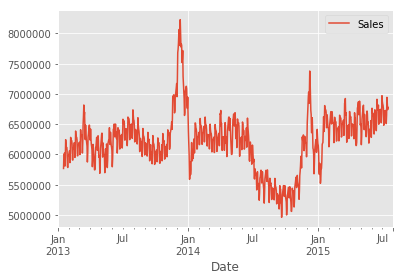

In [132]:
daily_store_sales.rolling(window=30, center=True).mean().plot()

### The Expanding Mean
The expanding mean simply uses all of the data points up to the current time to calculate the mean, as opposed to a moving window.

#### Calculate and plot the expanding mean below. Resample by quarter.

In [133]:
rolling_mean = data.Sales.resample('Q').sum().rolling(window=1, center=False).mean()
expanding_mean = data.Sales.resample('Q').sum().expanding().mean()

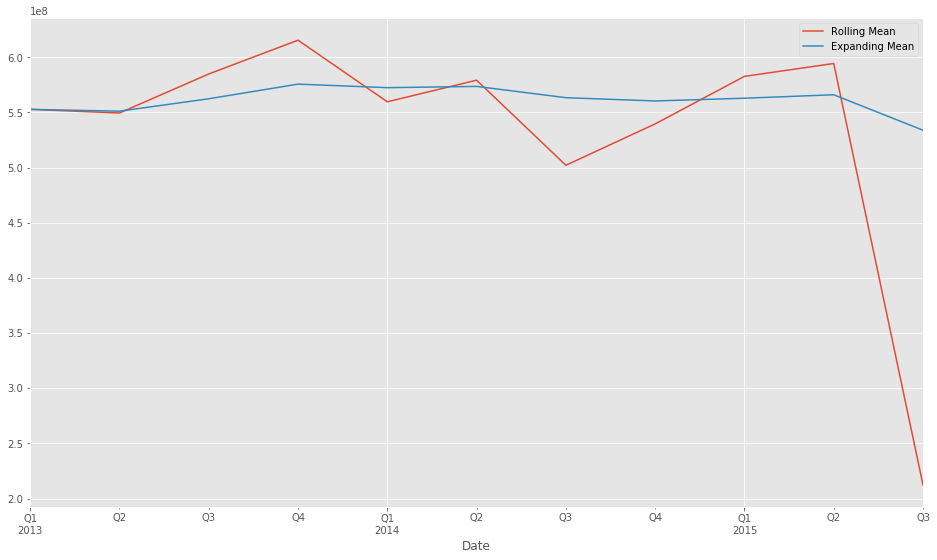

In [134]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [16,9]
fig, ax = plt.subplots()
rolling_mean.plot(legend = True)
expanding_mean.plot(legend = True)
ax.legend(['Rolling Mean', 'Expanding Mean'])

### Exponentially Weighted Windows
Exponentially weighted windows are one of the most common and effective ways of averaging out noise in time series data. The averaging is done with an "exponential decay" on the contribution of prior means, decreasing the contribution of time points that are further in the past.

The (adjusted) exponentially weighted mean for time, $t$, is defined as:

<a id="-xt--fracxt-----alphaxt------alphaxt--------alphatx------alpha-----alpha-------alphat-"></a>
### $$ x_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2x_{t-1} + ... + (1 - \alpha)^{t}x_0} {1 + (1 - \alpha) + (1 - \alpha)^2 + ... + (1 - \alpha)^{t}} $$

> **Note:** Review Pandas' [documentation](http://pandas.pydata.org/pandas-docs/stable/computation.html#exponentially-weighted-windows) for more information.

**Calculate and plot the exponentially weighted sum along with the rolling sum. What's the difference?**

For example: `.resample('Q').sum().ewm(span=10).mean()`.



In [135]:
rolling_mean = data.Sales.resample('Q').sum().rolling(window=2, center=True).mean()
exp_weighted_mean = data.Sales.resample('Q').sum().ewm(span=10).mean()

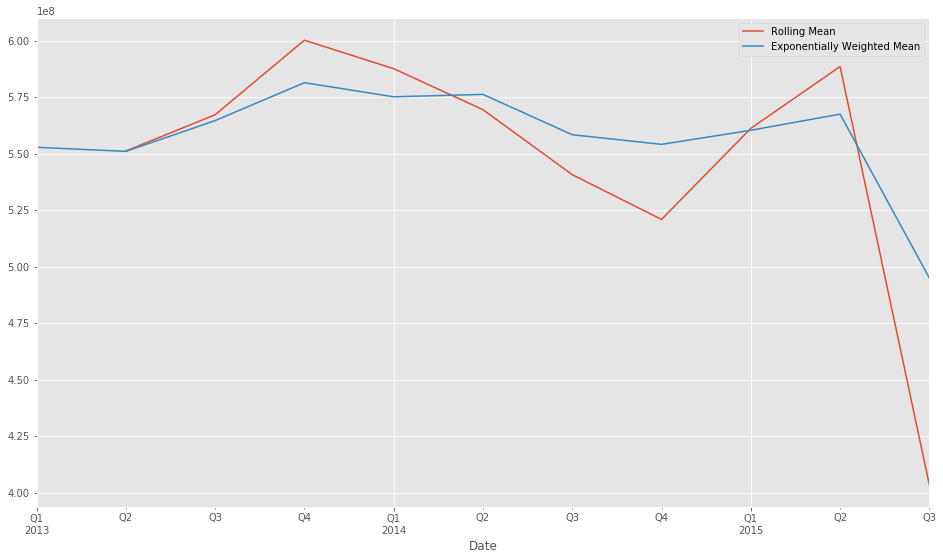

In [136]:
plt.rcParams["figure.figsize"] = [16,9]
fig, ax = plt.subplots()
rolling_mean.plot(legend = True)
exp_weighted_mean.plot(legend = True)
ax.legend(['Rolling Mean', 'Exponentially Weighted Mean'])

*Note that rolling doesn't understand if you are missing periods (e.g., if you roll over three days and your data are missing weekends, it'll roll Fri/Sat/Sun), so you need to resample first if you care about that.*

## Shifting and Lagging Time Series Data
Another common operation on time series data is shifting or lagging values backward and forward in time. This can help us calculate the percentage of change from sample to sample. Pandas has a `.shift()` method for shifting the data in a DataFrame.

Let's take a look at the Rossman data when we apply lagged features. 

In [138]:
shifted_forward = data.shift(1)
shifted_forward.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-31,1.0,5.0,5263.0,555.0,1.0,1.0,0,1.0
2015-07-31,2.0,5.0,6064.0,625.0,1.0,1.0,0,1.0
2015-07-31,3.0,5.0,8314.0,821.0,1.0,1.0,0,1.0
2015-07-31,4.0,5.0,13995.0,1498.0,1.0,1.0,0,1.0


*Notice that the first row now contains NaN values because there wasn't a previous day's data to shift to that day.*

Next, let's shift the sales prices by five days.

In [34]:
shifted_forward5 = data.shift(5)
shifted_forward5.head(10)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-31,1.0,5.0,5263.0,555.0,1.0,1.0,0,1.0
2015-07-31,2.0,5.0,6064.0,625.0,1.0,1.0,0,1.0
2015-07-31,3.0,5.0,8314.0,821.0,1.0,1.0,0,1.0
2015-07-31,4.0,5.0,13995.0,1498.0,1.0,1.0,0,1.0


We can also use negative numbers to shift the sales values in the reverse direction.

In [35]:
shifted_backward = data.shift(-1)
shifted_backward.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,2.0,5.0,6064.0,625.0,1.0,1.0,0,1.0
2015-07-31,3.0,5.0,8314.0,821.0,1.0,1.0,0,1.0
2015-07-31,4.0,5.0,13995.0,1498.0,1.0,1.0,0,1.0
2015-07-31,5.0,5.0,4822.0,559.0,1.0,1.0,0,1.0
2015-07-31,6.0,5.0,5651.0,589.0,1.0,1.0,0,1.0


Lags can be used to calculate the changes in the values you are tracking with your time series data. In this case, we can use Pandas' `.shift()` method to look at the changes in sales. 

Let's create a new column in our Rossman DataFrame that contains the previous day's sales. 

*Note that we add `.copy()` to the end of the chained assignment to explicitly tell Pandas that this will be a copy and not a view. Here is a useful [video](https://www.youtube.com/watch?v=4R4WsDJ-KVc) that helps explain how to avoid SettingCopyWithWarning errors in Pandas.*

In [139]:
data['Prev Day Sales'] = data['Sales'].shift(1).copy()
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Prev Day Sales
Date,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,NaN
2015-07-31,2,5,6064,625,1,1,0,1,5263.0
2015-07-31,3,5,8314,821,1,1,0,1,6064.0
2015-07-31,4,5,13995,1498,1,1,0,1,8314.0
2015-07-31,5,5,4822,559,1,1,0,1,13995.0


Using our new column, it's simple to calculate the one-day change in sales at Store 1. Let's create a new column for this value in our DataFrame as well.

In [140]:
data['Sales Change'] = data['Sales'] - data['Prev Day Sales'].copy()
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Prev Day Sales,Sales Change
Date,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,NaN,NaN
2015-07-31,2,5,6064,625,1,1,0,1,5263.0,801.0
2015-07-31,3,5,8314,821,1,1,0,1,6064.0,2250.0
2015-07-31,4,5,13995,1498,1,1,0,1,8314.0,5681.0
2015-07-31,5,5,4822,559,1,1,0,1,13995.0,-9173.0


In [141]:
data["Percentage Change"] = ((data['Sales'] / data["Prev Day Sales"]) * 100).copy()

In [142]:
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Prev Day Sales,Sales Change,Percentage Change
Date,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,NaN,NaN,NaN
2015-07-31,2,5,6064,625,1,1,0,1,5263.0,801.0,115.219457
2015-07-31,3,5,8314,821,1,1,0,1,6064.0,2250.0,137.104222
2015-07-31,4,5,13995,1498,1,1,0,1,8314.0,5681.0,168.330527
2015-07-31,5,5,4822,559,1,1,0,1,13995.0,-9173.0,34.455163


## Time Series modeling with FBProphet
You will need to install prophet for this notebook. While we've used `pip install` in the past, it often causes errors. So, we'll use an alternative: `conda install -c conda-forge fbprophet`

In [ ]:
!conda install -c conda-forge fbprophet --yes

In [144]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
 
%matplotlib inline
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

# Read in the data

Read the data in from the retail sales CSV file in the examples folder then set the index to the 'date' column. We are also parsing dates in the data file.

In [157]:
#Read in the bikeshare data, and change the datetime column to a datetime object. DO NOT SET TO INDEX
bikes = pd.read_csv('./data/bikeshare.csv')

In [145]:
#example: sales data
sales_df = pd.read_csv('./data/retail_sales.csv', parse_dates = True, low_memory = False)

In [146]:
sales_df.head()

,date,sales
0,2009-10-01,338630
1,2009-11-01,339386
2,2009-12-01,400264
3,2010-01-01,314640
4,2010-02-01,311022


# Prepare for Prophet

For prophet to work, we need to change the names of these columns to 'ds' and 'y', so lets just create a new dataframe and keep our old one handy (you'll see why later). The new dataframe will initially be created with an integer index so we can rename the columns

In [147]:
sales_df.rename(columns={'date':'ds', 'sales':'y'}, inplace = True)

In [148]:
sales_df.head()

,ds,y
0,2009-10-01,338630
1,2009-11-01,339386
2,2009-12-01,400264
3,2010-01-01,314640
4,2010-02-01,311022


Now's a good time to take a look at your data.  Plot the data using pandas' ```plot``` function

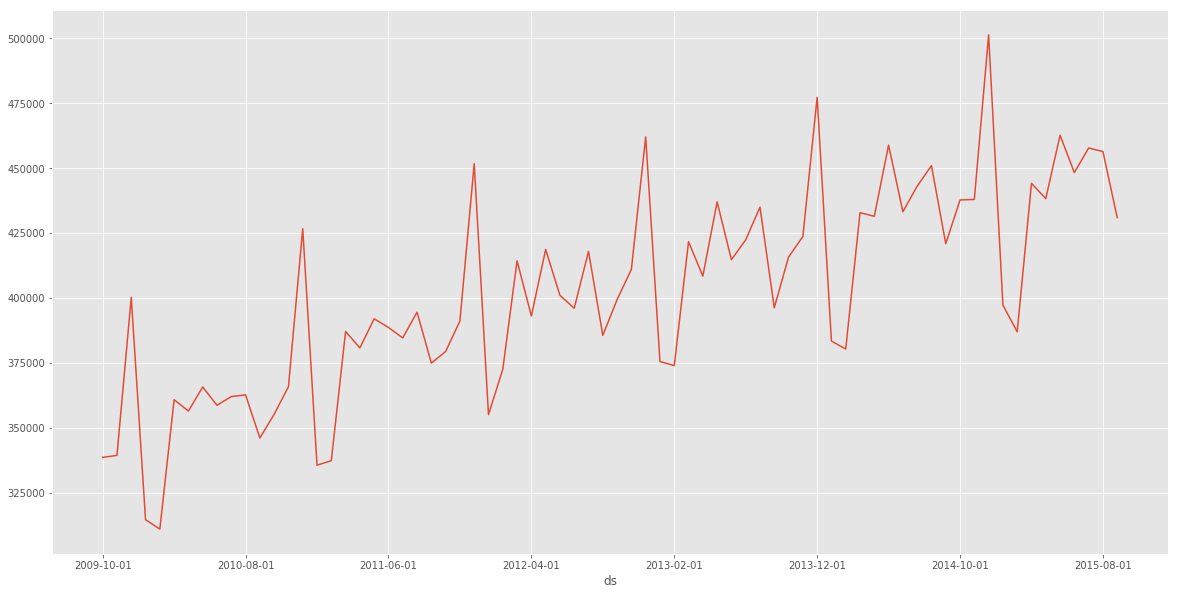

In [149]:
sales_df.set_index('ds').y.plot()

When working with time-series data, its good to take a look at the data to determine if trends exist, whether it is stationary, has any outliers and/or any other anamolies. Facebook prophet's example uses the log-transform as a way to remove some of these anomolies but it isn't the absolute 'best' way to do this...but given that its the example and a simple data series, I'll follow their lead for now.  Taking the log of a number is easily reversible to be able to see your original data. 

To log-transform your data, you can use numpy's log() function

In [152]:
sales_df['y'] = np.log(sales_df['y'])

In [153]:
sales_df.tail()

,ds,y
67,2015-05-01,13.044650
68,2015-06-01,13.013060
69,2015-07-01,13.033991
70,2015-08-01,13.030993
71,2015-09-01,12.973671


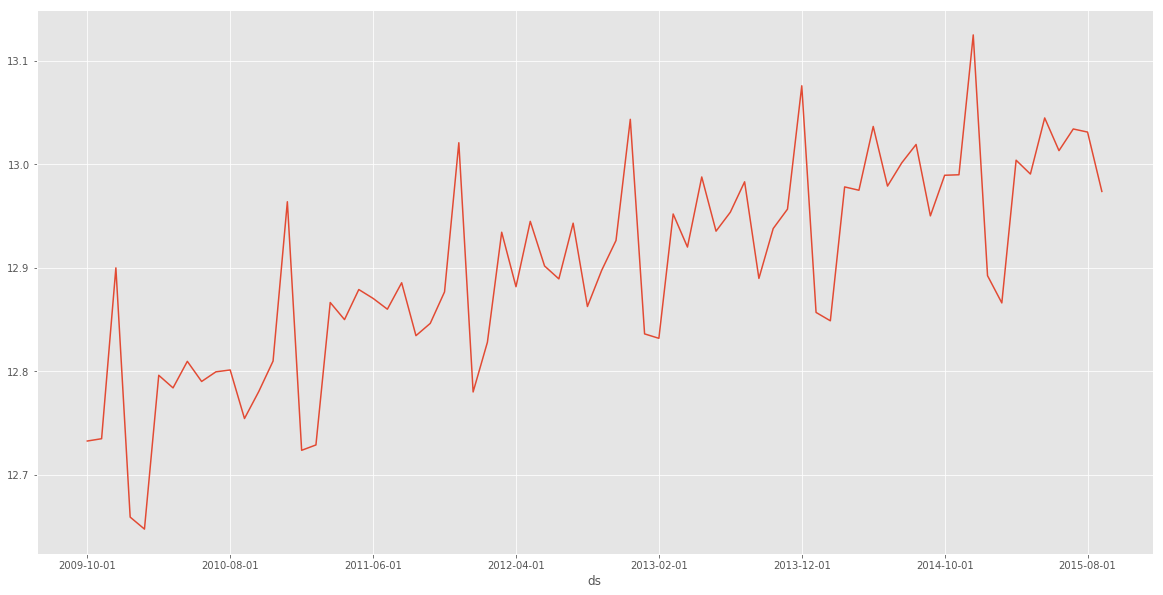

In [154]:
sales_df.set_index('ds').y.plot()

As you can see in the above chart, the plot looks the same as the first one but just at a different scale.

## Your Turn: Now do the same with the bikeshare data


In [159]:
bikes.rename(columns = {'datetime': 'ds', 'count': 'y'}, inplace = True)

In [165]:
bikes['ds'] = pd.to_datetime(bikes.ds)

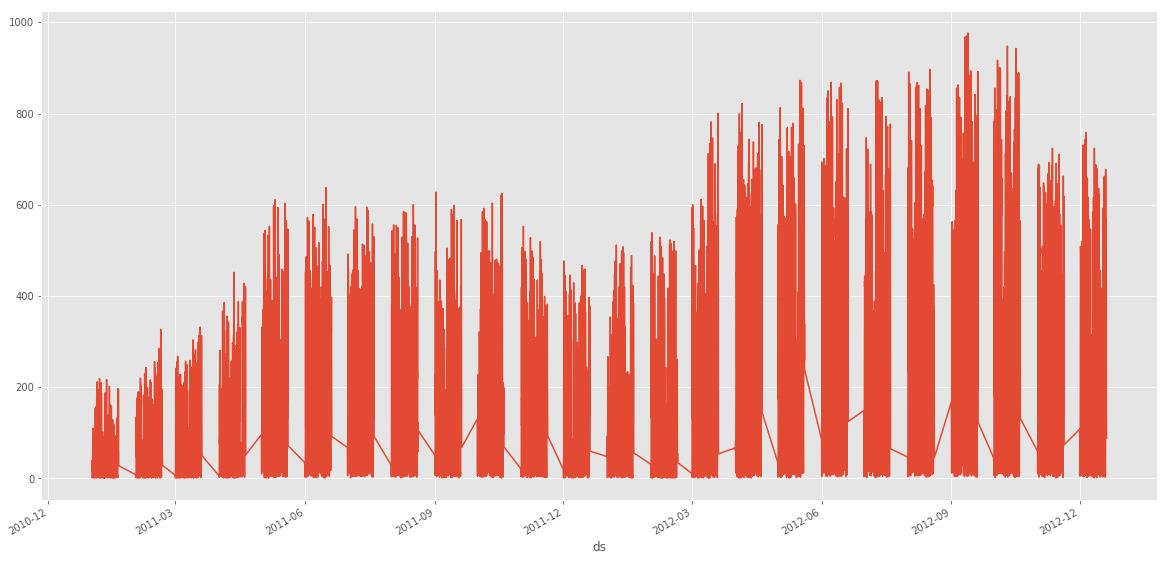

In [166]:
bikes.set_index('ds').y.plot()

In [167]:
bikes['y2'] = np.log(bikes['y'])

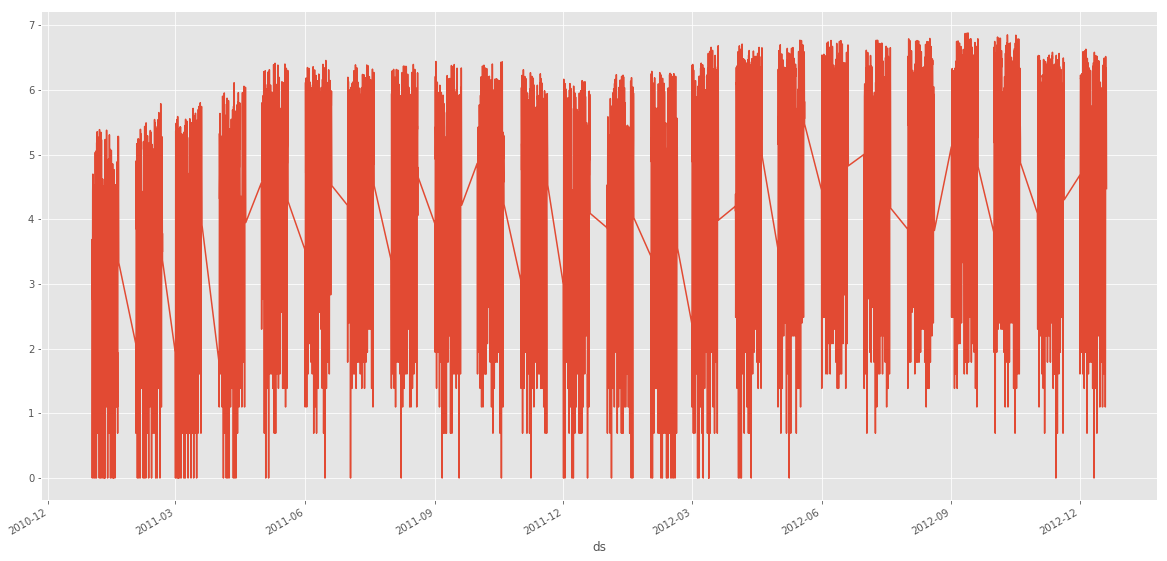

In [168]:
bikes.set_index('ds').y2.plot()

In [188]:
bike_2 = bikes.set_index('ds').resample('D').mean()

In [193]:
bike_2.reset_index(inplace = True)
bike_2

,ds,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,y,y2
0,2011-01-01,1.0,0.0,0.0,1.583333,14.110833,18.181250,80.583333,10.749871,13.791667,27.250000,41.041667,3.123272
1,2011-01-02,1.0,0.0,0.0,1.956522,14.902609,17.686957,69.608696,16.652122,5.695652,29.130435,34.826087,2.984832
2,2011-01-03,1.0,0.0,1.0,1.000000,8.050909,9.470227,43.727273,16.636709,5.454545,55.863636,61.318182,3.525483
3,2011-01-04,1.0,0.0,1.0,1.043478,8.200000,10.606087,59.043478,10.739809,4.695652,63.217391,67.913043,3.514888
4,2011-01-05,1.0,0.0,1.0,1.000000,9.305217,11.463478,43.695652,12.522300,3.565217,66.000000,69.565217,3.630374
...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,2012-12-15,4.0,0.0,0.0,1.375000,13.290833,16.919167,65.041667,7.125450,31.958333,178.333333,210.291667,4.793189
715,2012-12-16,4.0,0.0,0.0,2.041667,14.862500,18.496875,83.875000,6.749692,22.416667,135.333333,157.750000,4.559007
716,2012-12-17,4.0,0.0,1.0,2.125000,16.126667,20.075000,90.708333,6.583308,8.833333,182.208333,191.041667,4.553800
717,2012-12-18,4.0,0.0,1.0,1.208333,16.844167,20.485417,66.625000,14.834079,18.041667,213.500000,231.541667,4.805578


## The math behind FBProphet

Prophet is a procedure for forecasting time series data based on an __additive__ model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects.

y(t) = g(t) + s(t) + h(t) + e(t)

g(t)

- trend models non-periodic changes (i.e. growth over time)

s(t)

- seasonality presents periodic changes (i.e. weekly, monthly, yearly)

h(t)

- ties in effects of holidays (on potentially irregular schedules ≥ 1 day(s))

e(t)

- covers idiosyncratic changes not accommodated by the model

The procedure provides two possible trend models for g(t), “a saturating growth model, and a piecewise linear model.”

- Linear Trend with Changepoints: For use when there is a 'maximum capacity', this is the default
- Saturating Growth Model: For use when there are no constants, and focus is on capacity for growth

# Running Prophet

Now, let's set prophet up to begin modeling our data.

Note: Since we are using monthly data, you'll see a message from Prophet saying ```Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.```  This is OK since we are workign with monthly data but you can disable it by using ```weekly_seasonality=True``` in the instantiation of Prophet.

In [223]:
sales_df

,ds,y
0,2009-10-01,12.732663
1,2009-11-01,12.734893
2,2009-12-01,12.899880
3,2010-01-01,12.659184
4,2010-02-01,12.647619
...,...,...
67,2015-05-01,13.044650
68,2015-06-01,13.013060
69,2015-07-01,13.033991
70,2015-08-01,13.030993


In [224]:
model = Prophet()
model.fit(sales_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecasting is fairly useless unless you can look into the future, so we need to add some future dates to our dataframe. For this example, I want to forecast 2 years into the future, so I'll built a future dataframe with 24 periods since we are working with monthly data. Note the ```freq='m'``` inclusion to ensure we are adding 24 months of data.

This can be done with the following code:


In [225]:
future = model.make_future_dataframe(periods=24, freq = 'm')
future.tail()

,ds
91,2017-04-30
92,2017-05-31
93,2017-06-30
94,2017-07-31
95,2017-08-31


To forecast this future data, we need to run it through Prophet's model.

In [226]:
forecast = model.predict(future)

The resulting forecast dataframe contains quite a bit of data, but we really only care about a few columns.  First, let's look at the full dataframe:

In [227]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
91,2017-04-30,13.041237,12.856745,13.237915,12.842004,13.223199,0.018364,0.018364,0.018364,0.018364,0.018364,0.018364,0.0,0.0,0.0,13.059601
92,2017-05-31,13.042942,12.839207,13.254262,12.826270,13.240381,0.012932,0.012932,0.012932,0.012932,0.012932,0.012932,0.0,0.0,0.0,13.055874
93,2017-06-30,13.044592,12.844944,13.287654,12.815334,13.257337,0.031733,0.031733,0.031733,0.031733,0.031733,0.031733,0.0,0.0,0.0,13.076325
94,2017-07-31,13.046298,12.810764,13.287157,12.799568,13.272466,0.009755,0.009755,0.009755,0.009755,0.009755,0.009755,0.0,0.0,0.0,13.056053
95,2017-08-31,13.048003,12.761113,13.270904,12.783300,13.286389,-0.020633,-0.020633,-0.020633,-0.020633,-0.020633,-0.020633,0.0,0.0,0.0,13.027370


We really only want to look at yhat, yhat_lower and yhat_upper, so we can do that with:

In [228]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
91,2017-04-30,13.059601,12.856745,13.237915
92,2017-05-31,13.055874,12.839207,13.254262
93,2017-06-30,13.076325,12.844944,13.287654
94,2017-07-31,13.056053,12.810764,13.287157
95,2017-08-31,13.027370,12.761113,13.270904


# Plotting Prophet results

Prophet has a plotting mechanism called ```plot```.  This plot functionality draws the original data (black dots), the model (blue line) and the error of the forecast (shaded blue area).

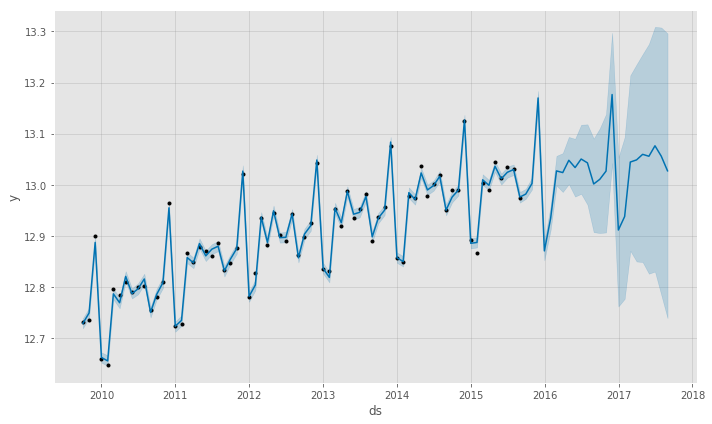

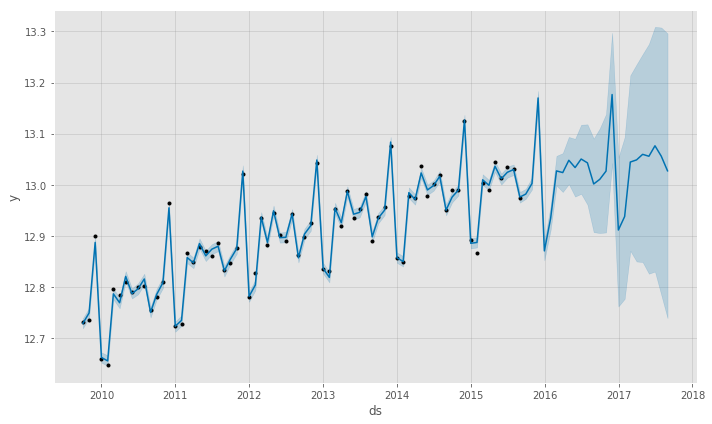

In [200]:
model.plot(forecast)

## Evaluating Prophet
The shaded blue area is the error of the forecast. But we can only eyeball it. Let's look at the R-squared (amount of variance) and Mean Squared Error. 

In [201]:
#To do this, we have to get the y-hat and original y's from the data
metric_df = forecast.set_index('ds')[['yhat']].join(sales_df.set_index('ds').y).reset_index()
metric_df.tail()

,ds,yhat,y
91,2017-04-30,13.059601,NaN
92,2017-05-31,13.055874,NaN
93,2017-06-30,13.076325,NaN
94,2017-07-31,13.056053,NaN
95,2017-08-31,13.027370,NaN


In [202]:
# The tail has NaN values, because they're predictions - there was no real Y. Let's drop those for model evaluation.
metric_df.dropna(inplace = True)

In [203]:
#Let's take a look at the numbers
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("R-squared: ", r2_score(metric_df.y, metric_df.yhat))
print("Mean Squared Error: ", mean_squared_error(metric_df.y, metric_df.yhat))
print("RMSE: ", np.sqrt(mean_squared_error(metric_df.y, metric_df.yhat)))


R-squared:  0.9937030580846195
Mean Squared Error:  6.305748851936586e-05
RMSE:  0.00794087454373672


An R2 value of .99 is phenomenal... and too good to be true. Our massive MSE confirms any suspcion tha thte model is overfit and won't be very predictive in the future. Part of the problem in this example is that the its monthly, and there aren't enough data points to build a robust model. 

## Now try with your bikeshare data

In [207]:
model = Prophet()
model.fit(bikes[['ds', 'y']])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [208]:
future = model.make_future_dataframe(periods=365, freq = 'd')
future.tail()

,ds
11246,2013-12-15 23:00:00
11247,2013-12-16 23:00:00
11248,2013-12-17 23:00:00
11249,2013-12-18 23:00:00
11250,2013-12-19 23:00:00


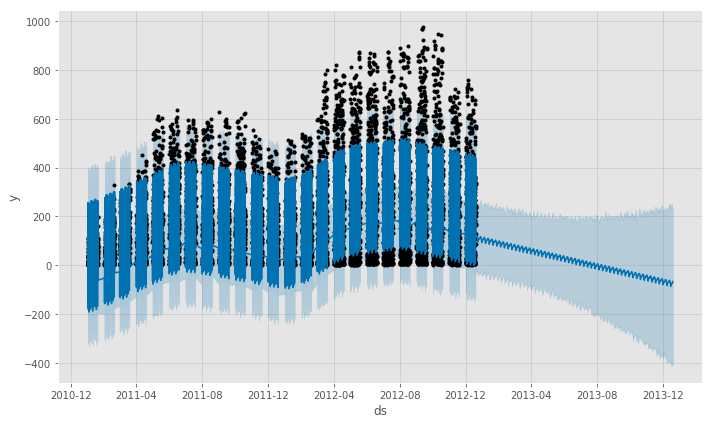

In [218]:
forecast = model.predict(future)
model.plot(forecast);

In [213]:
metric_df = forecast.set_index('ds')[['yhat']].join(bikes.set_index('ds').y).reset_index()
metric_df.dropna(inplace = True)

print("R-squared: ", r2_score(metric_df.y, metric_df.yhat))
print("Mean Squared Error: ", mean_squared_error(metric_df.y, metric_df.yhat))
print("RMSE: ", np.sqrt(mean_squared_error(metric_df.y, metric_df.yhat)))

R-squared:  0.6192001317450853
Mean Squared Error:  12494.157493282395
RMSE:  111.77726733679972


In [220]:
bikes.y.describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: y, dtype: float64

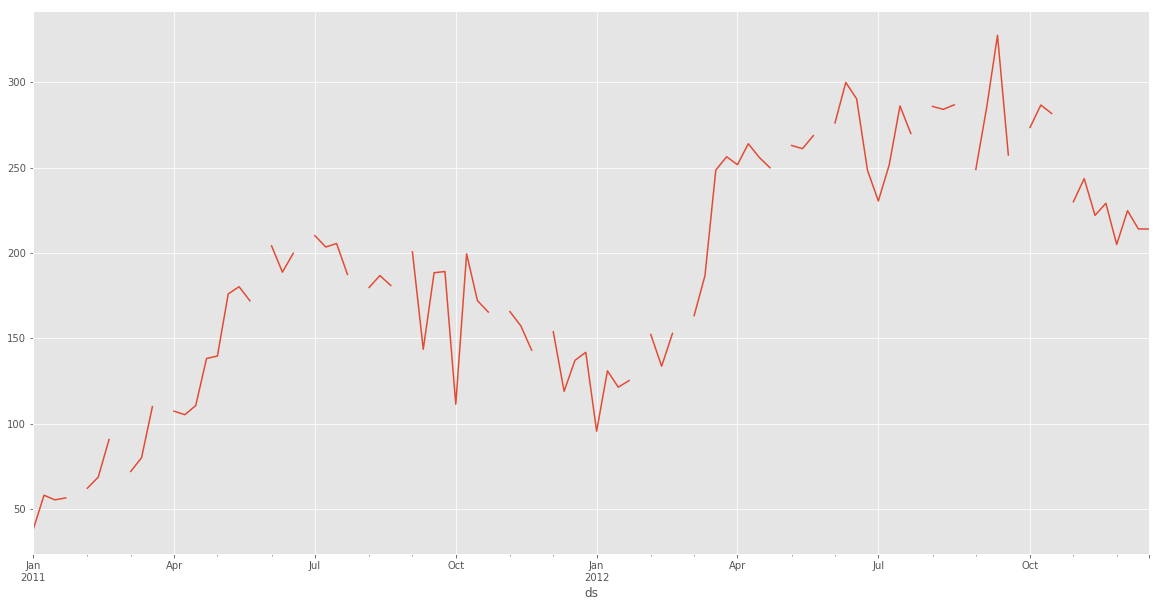

In [217]:
bikes.set_index('ds').resample('W').y.mean().plot()

## Accounting for Seasonality and Trends

We can see from this data that there is a spike in the same month each year. While spike could be due to many different reasons, let's assume its because there's a major promotion that this company runs every year at that time, which is in December for this dataset.

When patterns repeat over *known, fixed periods* of time within a data set, we call this **seasonality**. A seasonal pattern exists when a series is influenced by factors related to the cyclic nature of time — i.e., time of month, quarter, year, etc. Seasonality is of a fixed and known period, otherwise it is not truly seasonality. Additionally, it must be either attributed to another factor or counted as a set of anomalous events in the data.

### Prophet calls them "holidays"

Because we know this promotion occurs every december, we want to use this knowledge to help prophet better forecast those months, so we'll use prohpet's ```holiday``` construct (explained here https://facebookincubator.github.io/prophet/docs/holiday_effects.html).

The holiday object is a pandas dataframe with the holiday and date of the holiday. For this example, the construct would look like this:

```promotions = pd.DataFrame({
  'holiday': 'december_promotion',
  'ds': pd.to_datetime(['2009-12-01', '2010-12-01', '2011-12-01', '2012-12-01',
                        '2013-12-01', '2014-12-01', '2015-12-01']),
  'lower_window': 0,
  'upper_window': 0,
})```

This ```promotions``` dataframe consisists of promotion dates for Dec in 2009 through 2015,  The ```lower_window``` and ```upper_window``` values are set to zero to indicate that we don't want prophet to consider any other months than the ones listed.

In [221]:
# Build the promotions dataframe from above here - be sure you understand the syntax and logic!
promotions = pd.DataFrame({
  'holiday': 'december_promotion',
  'ds': pd.to_datetime(['2009-12-01', '2010-12-01', '2011-12-01', '2012-12-01',
                        '2013-12-01', '2014-12-01', '2015-12-01']),
  'lower_window': 0,
  'upper_window': 0,
})

In [222]:
promotions.head()

,holiday,ds,lower_window,upper_window
0,december_promotion,2009-12-01,0,0
1,december_promotion,2010-12-01,0,0
2,december_promotion,2011-12-01,0,0
3,december_promotion,2012-12-01,0,0
4,december_promotion,2013-12-01,0,0


In [229]:
#Now let's set up prophet to model our data using holidays
model = Prophet(holidays=promotions)
model.fit(sales_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [230]:
#We've instantiated the model, so now we need to build our future dates to forecast into!
future = model.make_future_dataframe(periods=24, freq = 'm')
future.tail()

#... and then run our future data through prophet's model
forecast = model.predict(future)

forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,december_promotion,...,holidays,holidays_lower,holidays_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-10-01,13.339920,12.718773,12.737868,13.339920,13.339920,-0.611085,-0.611085,-0.611085,0.000000,...,0.000000,0.000000,0.000000,-0.611085,-0.611085,-0.611085,0.0,0.0,0.0,12.728835
1,2009-11-01,13.352348,12.739771,12.759019,13.352348,13.352348,-0.603356,-0.603356,-0.603356,0.000000,...,0.000000,0.000000,0.000000,-0.603356,-0.603356,-0.603356,0.0,0.0,0.0,12.748992
2,2009-12-01,13.364375,12.879086,12.898472,13.364375,13.364375,-0.476163,-0.476163,-0.476163,-7.294961,...,-7.294961,-7.294961,-7.294961,6.818798,6.818798,6.818798,0.0,0.0,0.0,12.888212
3,2010-01-01,13.373219,12.651971,12.671573,13.373219,13.373219,-0.711236,-0.711236,-0.711236,0.000000,...,0.000000,0.000000,0.000000,-0.711236,-0.711236,-0.711236,0.0,0.0,0.0,12.661983
4,2010-02-01,13.382063,12.645602,12.665854,13.382063,13.382063,-0.726387,-0.726387,-0.726387,0.000000,...,0.000000,0.000000,0.000000,-0.726387,-0.726387,-0.726387,0.0,0.0,0.0,12.655677


In [231]:
#while our new df contains a bit of data, we only care about a few features...
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
91,2017-04-30,13.070826,12.842773,13.302059
92,2017-05-31,13.058429,12.813154,13.301962
93,2017-06-30,13.070752,12.808157,13.333268
94,2017-07-31,13.043118,12.763073,13.330839
95,2017-08-31,13.016385,12.718375,13.319663


## Visualizing with holidays!
Same as above at first blush!

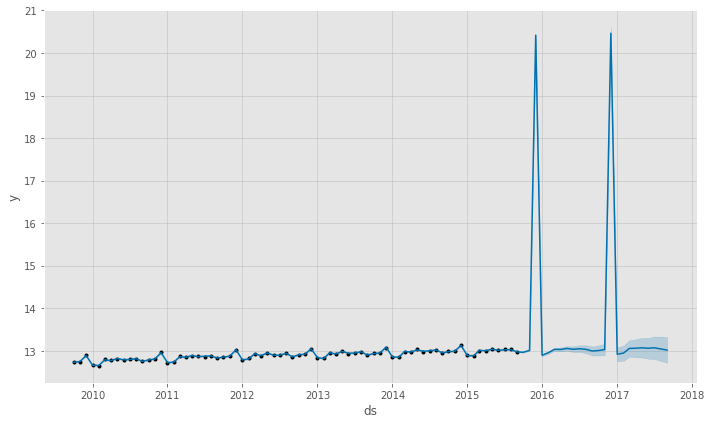

In [232]:
#use Prophet's .plot() method to visualize your timeseries.
model.plot(forecast);

Prophet also allows you to examine the ```components``` of a timeseries using the ```.plot_components()``` method

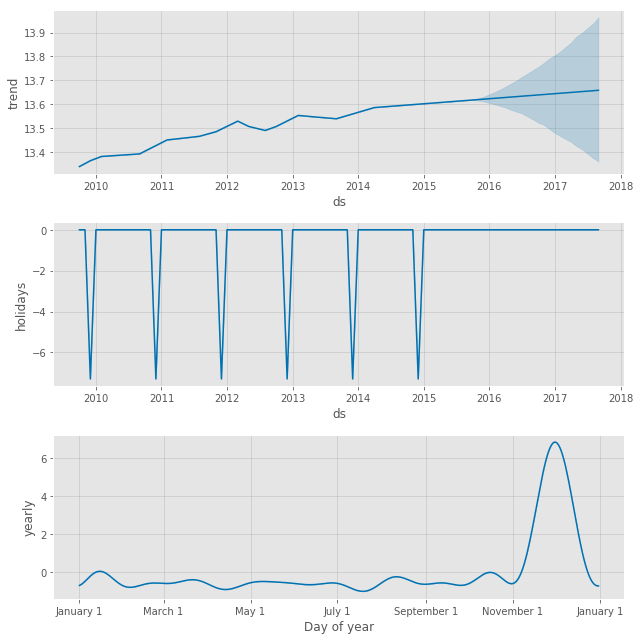

In [233]:
model.plot_components(forecast);

## Why holidays matter
Let's re-run our prophet model without holidays, for comparison

In [234]:
model_no_holiday = Prophet()
model_no_holiday.fit(sales_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [235]:
future_no_holiday = model_no_holiday.make_future_dataframe(periods=24, freq = 'm')
future_no_holiday.tail()

,ds
91,2017-04-30
92,2017-05-31
93,2017-06-30
94,2017-07-31
95,2017-08-31


In [236]:
forecast_no_holiday = model_no_holiday.predict(future)

There probably won't be a massive difference, given the small amount of data with which we're working on this example. But with greater data comes greater variance...

In [237]:
#join the dataframes
forecast.set_index('ds', inplace=True)
forecast_no_holiday.set_index('ds', inplace=True)
compared_df = forecast.join(forecast_no_holiday, rsuffix="_no_holiday")

In [238]:
#we're only interested in the predictions, and let's move back to the original scale
compared_df= np.exp(compared_df[['yhat', 'yhat_no_holiday']])

In [239]:
# Create a feature that is the percentage difference between holiday vs. none
compared_df['diff_per'] = 100 * (compared_df['yhat'] - compared_df['yhat_no_holiday']) / compared_df['yhat_no_holiday']
print("difference: ", round(compared_df.diff_per.mean(), 2), "%")

difference:  2987.17 %


While the difference here is less than 1%, that can be a large amount of money left on the table if your business is a global enterprise!

In [ ]:
3.1 Trend parameters

Parameter	Description
growth	linear’ or ‘logistic’ to specify a linear or logistic trend
changepoints	List of dates at which to include potential changepoints (automatic if not specified)
n_changepoints	If changepoints in not supplied, you may provide the number of changepoints to be automatically included
changepoint_prior_scale	Parameter for changing flexibility of automatic changepoint selection
 

3.2 Seasonality & Holiday Parameters

Parameter	Description
yearly_seasonality	Fit yearly seasonality
weekly_seasonality	Fit weekly seasonality
daily_seasonality	Fit daily seasonality
holidays	Feed dataframe containing holiday name and date
seasonality_prior_scale	Parameter for changing strength of seasonality model
holiday_prior_scale	Parameter for changing strength of holiday model

## Adding Regressors

### The general recipe

m = Prophet()

m.add_regressor('add1')

m.add_regressor('add2')

...

m.fit(df)

future = m.make_future_dataframe(periods=10)

forecast = m.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)



*Note that the additional variables should have values for your future (test) data. If you don't have them, you could start by using FBProphet to predict add1 and add2 with  with univariate timeseries, and then predict y with add_regressor and the predicted add1 and add2 as future values of the additional variables.*



In [246]:
temperature = bikes[['ds', 'temp']]
temperature.rename(columns = {'temp': 'y'}, inplace = True)

/Users/datascience/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [254]:
temp_m = Prophet()
temp_m.fit(temperature[['ds', 'y']])
temp_m_future = temp_m.make_future_dataframe(periods = 365, freq = 'D')
temp_m_forecast = temp_m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [255]:
yhat_temp = temp_m_forecast['yhat']

In [256]:
m = Prophet()
m.add_regressor('temp')
m.fit(bikes[['ds', 'y', 'temp', 'humidity']])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [257]:
future = m.make_future_dataframe(periods = 365, freq = 'D')
future['temp'] = yhat_temp
forecast = m.predict(future)

In [259]:
#Another approach to evaluation

from fbprophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(m, horizon='30 days')
df_p = performance_metrics(df_cv)
df_p.tail(5)

INFO:fbprophet:Making 40 forecasts with cutoffs between 2011-04-14 23:00:00 and 2012-11-19 23:00:00


,horizon,mse,rmse,mae,mape,mdape,coverage
632,29 days 20:00:00,16995.113222,130.365307,97.279944,2.003309,0.408613,0.679425
633,29 days 21:00:00,16412.315837,128.110561,95.686524,1.999832,0.405247,0.686205
634,29 days 22:00:00,15892.756657,126.066477,94.064150,1.994813,0.402889,0.692450
635,29 days 23:00:00,15675.861602,125.203281,93.269365,1.989545,0.403185,0.695398
636,30 days 00:00:00,15579.630566,124.818390,92.861038,1.987984,0.407244,0.697067


In [2]:
#How did your model do? Does adding additional regressors help or inhibit your model? 


# Prophet for Market prediction - lab time!
Prophet can detect changepoints in timeseries data, and we can often use it to our advantage. Let's grab FRED economic data and see how this goes.

In [ ]:
#Download 01/2009 - current S&P500 data at https://fred.stlouisfed.org/series/SP500 and import it into pandas
market_df = 

In [ ]:
#Now prepare your data for prophet. Hint: prophet needs "ds" and a log-transformed "y" to work


In [ ]:
#Instantiate the model, and fit our data
model = Prophet()


In [ ]:
#build the future dataframe, forecasting for 1 year from now. THen create a forecast by passing the future into model.predict()
future = model.make_future_dataframe(periods = 365)
forecast = 

In [ ]:
#now plot it!


It's hard to see what's going on here, in part because we have such a condensed visual. Let's look at the last 2 years of forecast vs. actual without looking at the future - we are just interested ing etting a visual of theerror between actual vs. forecast

In [ ]:
#Start by setting the index of the forecast df to the ds, and joining it to the marekt_df
two_years = 

#now set two_years equal to the last 800 data points
two_years = two_years[['SP500', 'yhat', 'yhat_upper', 'yhat_lower' ]].dropna().tail(800)

In [ ]:
#now trasnform the predictions back to the original scale of the data
two_years['yhat']=np.exp(two_years.yhat)
two_years['yhat_upper']=np.exp(two_years.yhat_upper)
two_years['yhat_lower']=np.exp(two_years.yhat_lower)

In [ ]:
#let's visualize the relationship between SP500 and yhat (our prediction) using pandas .plot()


Our forecast does great at trending, but doesn't do well at catching the volatility of the market. This would be very good for 'riding trends', but not so good for catching peaks and dips. 

We can see this in the numbers as well

In [ ]:
#calculate the r2


In [ ]:
#MAE


In [ ]:
#RMSE


Another way to tlook at the usefulness of this forecast is to plot the upper and lower confidence bands against the actuals. We can do that with a plot that combines yhat_upper and yhat_lower with the rest into a matplotlib subplot. 

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(two_years.SP500)
ax1.plot(two_years.yhat)
ax1.plot(two_years.yhat_upper, color='black',  linestyle=':', alpha=0.5)
ax1.plot(two_years.yhat_lower, color='black',  linestyle=':', alpha=0.5)

ax1.set_title('Actual S&P 500 (Orange) vs S&P 500 Forecasted Upper & Lower Confidence (Black)')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

As we saw above, if you're trying to do shortterm trading then this model is useless. But if you are investing with a timeframe of months to years, this forecast might provide some value. 

In [ ]:
#We can also look at this from the full df. Here I build it manually again!
fig, ax1 = plt.subplots()
ax1.plot(full_df.SP500)
ax1.plot(full_df.yhat, color='black', linestyle=':')
ax1.fill_between(full_df.index, np.exp(full_df['yhat_upper']), np.exp(full_df['yhat_lower']), alpha=0.5, color='darkgray')
ax1.set_title('Actual S&P 500 (Orange) vs S&P 500 Forecasted (Black) with Confidence Bands')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

L=ax1.legend() #get the legend
L.get_texts()[0].set_text('S&P 500 Actual') #change the legend text for 1st plot
L.get_texts()[1].set_text('S&P 5600 Forecasted') #change the legend text for 2nd plot